# AGR.Algorithmes gloutons.Introduction

<u>Source</u> : lycée F.Mauriac, Bordeaux.

Un glouton mais ce n'est pas le même :)
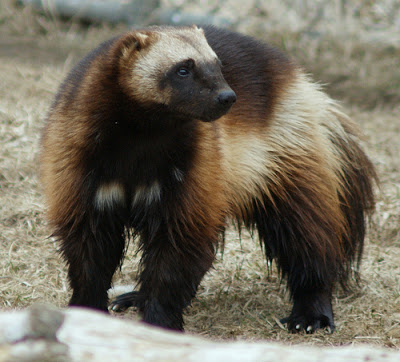


Un algorithme est qualifié de <b>«glouton»</b> si le problème qu'il essaie de résoudre est décomposé en une <b>succession de problèmes identiques pour lesquels l'algorithme va chercher une solution optimale</b>.  

La question est : lorsqu'on fait à chaque étape le meilleur choix possible, est-ce que la solution finale à laquelle on arrive est la meilleure possible ?   
Est-ce que faire le meilleur choix à chaque étape nous assure le meilleur choix global ?

## <u>Une première approche</u> : Exemple d'algorithme glouton 


* On part du point O. 
* On doit avoir atteint le plus rapidement possible tous les points A, B, C, D, E, F. 
* L'ordre de parcours des points n'est pas important.

![](http://glassus1.free.fr/dataNSI/pluscourt1.png)


La philosophie de l'algorithme glouton implique qu'à chaque étape, on va se diriger vers le point le plus proche. 

Quel est alors le parcours final ?

<b>Ecrire </b> la réponse ici : 

<b><u> Remarque</u></b> : Ce chemin est-il optimal ? 

<b>Trouver</b> un meilleur chemin : 



## Conclusion :


Un algorithme glouton est une méthode rapide et souvent efficace, mais qui ne garantit pas l'optimalité de la solution trouvée.

# <u>Exemple</u> : Le problème du rendu de monnaie

#### On va travailler avec des pièces (ou billets) de 1, 2, 5, 10, 20, 50, 100, 200 euros.

L'objectif est de créer un programme renvoyant, pour une somme $s$ entrée en paramètre, la combinaison utilisant un **minimum** de pièces ou de billets pour fabriquer la somme $s$. 

Par exemple, lorsque l'on paie avec un billet de 20 € un objet coûtant 11 €, il est préférable qu'on vous rende vos 9 € de monnaie par $$ 9 = 5 + 2+2$$ plutôt que par $$ 9=2+2+2+1+1+1$$

La résolution de ce problème peut se faire de manière <b>gloutonne</b> : à chaque étape, vous allez essayer de rendre la plus grosse pièce (ou billet) possible, on cherche bien la meilleure solution à chaque étape.

<b><u>Question</u></b> : <b>Tester</b> le programme suivant (rendu pour 13 €). <b>Essayer</b> avec d'autres valeurs, le script semble-t-il optimal ?

In [ ]:
###################################################################
############ Ce script simule un rendu de pièce glouton ###########
###################################################################

pieces  = [1,2,5,10,20,50,100,200]
somme_rendue = 13

def rendu(s):
    i =  len(pieces) - 1
    solution = []
    while (s > 0) and (i >= 0) :
        if pieces[i] <= s :
            solution.append(pieces[i])
            s -= pieces[i]
        else :
            i -= 1
    return solution


In [ ]:
# On simule ici le rendu 
print(rendu(somme_rendue))

### Retour sur l'optimalité de l'algorithme glouton

On suppose qu'il n'y ait plus de pièces/billets de 10 et 5 euros.

<b><u>Question</u></b> : Faire <b>fonctionner</b> l'algorithme pour la somme de 10 euros.

In [ ]:
pieces  = [1,2,20,50,100,200]
somme_rendue = 10

def rendu(s):
    i =  len(pieces) - 1
    solution = []
    while (s > 0) and (i >= 0) :
        if pieces[i] <= s :
            solution.append(pieces[i])
            s -= pieces[i]
        else :
            i -= 1
    return solution

In [ ]:
print(rendu(somme_rendue))

Ce n'est pas une solution optimale !  
`[20, 20, 20, 2, 1]` serait bien mieux.

**Moralité** : Lors d'un rendu de monnaie, l'algorithme glouton n'est optimal que _sous certaines conditions_, ce qui est un peu décevant. Un système de monnaie qui rend l'algorithme glouton est dit **canonique**. Il est difficile de caractériser mathématiquement si un système de monnaie est canonique ou pas.

# Le problème du sac à dos _(Knapsack Problem)_

![Texte alternatif…](data/kp.png)



Le problème est celui-ci : on dipose d'un sac d'une contenance limitée (sur le dessin ci-dessus, 15kg) et on souhaite maximiser la valeur totale des objets que l'on met dans le sac. Evidemment, la somme de leur masse ne doit pas dépasser 15 kg.

Ce problème (de la catégorie des problème dits d'_analyse combinatoire_), malgré sa simplicité est un problème majeur d'optimisation. 

Actuellement :


*   On sait trouver LA meilleure solution, mais en explorant toutes les combinaisons une par une. Cette méthode par **force brute** est inapplicable si beaucoup d'objets sont en jeu.
*   On sait facilement trouver une _bonne_ solution, mais pas forcément la meilleure, par exemple en adoptant une stratégie gloutonne.
* On ne sait pas trouver facilement (en temps polynomial) la meilleure solution. Si vous y arrivez, [1 Million de $](https://www.claymath.org/millennium-problems/p-vs-np-problem) sont pour vous.



## Petite aide technique avant de commencer

On dispose d'une liste  `mylist = [["A",3], ["B",2], ["C",8]]`. 

Comment classer les éléments de cette liste par leur deuxième élément ???

On va procéder en 2 temps :
- création d'une fonction qui renvoie le deuxième élément d'un objet liste
- tri de la liste grâce à cette fonction

In [ ]:
mylist = [["A",3], ["B",2], ["C",8]]

In [ ]:
def ledeuxieme(k) :
    return k[1]

simpsons = ['Bart', 'Lisa', 'Maggie']
ledeuxieme(simpsons)

In [ ]:
mynewlist = sorted(mylist, key = ledeuxieme, reverse = True)
print(mynewlist)


## Retour sur le problème du sac à dos
On considère un sac de 40 kg et les objets suivants :

| objet  |  A  |  B  |  C  |  D  |  E  |  F  |
|:------:|:---:|:---:|:---:|:---:|:---:|:---:|
|  masse |  13 |  12 |  8  |  10 |  14 |  18 |
| valeur | 700 | 500 | 200 | 300 | 600 | 800 |

Quels objets faut-il prendre ?

**stratégie gloutonne :**
- on va classer les objets dans l'ordre décroissant de leur taux de valeur (taux de valeur = valeur / masse). Ainsi le premier élément de la liste sera celui ayant le meilleur rapport valeur/masse.
- on prend le premier élément de la liste, puis le deuxième, etc., tant que le sac peut encore les contenir.


In [10]:
obj =[["A",13,700], ["B",12,500], ["C",8,200], ["D",10,300],["E", 14,600],["F",18,800]]
poids_max = 40

In [11]:
def ratio(objet):
    # renvoie le rapport prix/poids d'un objet
    return objet[2] / objet[1]

obj_tries = sorted(obj, key = ratio, reverse = True)


In [ ]:
print(obj_tries)

In [ ]:
sol = []
valeur_totale = 0
poids_total = 0


i = 0
while i < len(obj_tries) : # tant qu'il me reste des objets à analyser
    if obj_tries[i][1] + poids_total <= poids_max : # je regarde si l'objet peut encore rentrer dans mon sac
        sol.append(obj_tries[i][0]) #  si oui je mets l'objet dans mon sac
        poids_total += obj_tries[i][1]    # si oui je mets à jour le poids de mon sac
        valeur_totale += obj_tries[i][2]
    i += 1 
print(sol, valeur_totale, poids_total)

### Question  (toujours la même) : 
L'algorithme glouton nous a-t-il donné la solution **optimale** ?  
On va pour cela avoir recours à la force brute pour tester toutes les combinaisons possibles.

### Force brute 
- Il faut créer une liste de mots binaires qui vont correspondre à chaque combinaison. Par exemple, '101001' signifiera qu'on prend les objets A, C et F.
Cette liste est de taille $2^n$, où $n$ est le nombre d'objets. C'est cela qui pose problème : avec 80 objets, on obtient une liste à traiter qui contient plus de $10^{24}$ objets, soit de l'ordre de grandeur du nombre d'étoiles dans l'Univers observable, ou de gouttes d'eau dans la mer, ou du nombre de grains de sables au Sahara... https://fr.wikipedia.org/wiki/Ordres_de_grandeur_de_nombres
- Une fois cette liste établie, il suffit de parcourir chaque élément et de calculer le poids total et la valeur totale correspondante. Si le poids total dépasse le poids autorisé, on met la valeur à 0 car cette combinaison ne nous intéresse pas.
- Il ne reste qu'à chercher la valeur maximale et regarder la combinaison à laquelle elle correspond.

In [13]:
obj =[["A",13,700], ["B",12,500], ["C",8,200], ["D",10,300],["E", 14,600],["F",18,800]]
poids_max = 40

In [14]:
comb = []
for i in range(2**len(obj)):
    k = bin(i)[2:]
    s = '0'*(len(obj)-len(k)) + k
    comb.append(s)

La liste `comb` contient bien toutes les mots possibles sur 6 bits.

In [ ]:
print(comb)

In [15]:
v = [] 
p = []
for k in comb :
    poids_comb = 0
    valeur = 0
    for i in range(len(obj)): 
        if k[i] == '1':
            poids_comb += obj[i][1]
            valeur += obj[i][2]
    if poids_comb > poids_max :
        valeur = 0
    v.append(valeur)
    p.append(poids_comb)

In [16]:
m = max(v)
sol_comb = comb[v.index(m)]
poids_comb = p[v.index(m)]

In [ ]:
print(sol_comb)

In [ ]:
print(poids_comb)

In [ ]:
mot_sol = ""
for k in range(len(sol_comb)) :
    if sol_comb[k] == '1' :
        mot_sol += obj[k][0]
print(mot_sol)     

La force brute a mis en évidence une combinaison **meilleure que celle donnée par l'algorithme glouton**. Par contre, la force brute est inenvisageable pour si le nombre d'objets est grand, alors que la stratégie gloutonne reste très rapide.

## Conclusion 

La stratégie gloutonne donne très rapidement des solutions **satisfaisantes** mais **pas forcément optimales**. Pour beaucoup de problèmes (dont le problème du sac à dos), la recherche d'une solution optimale sans passer par la force brute semble impossible (mais n'est pas démontrée).  
Dans ce cas-là, la stratégie gloutonne peut être employée pour avoir vite et bien une solution convenable, même si peut-être non optimale.